## Опис домашнього завдання

# Завдання 1
Напишіть програму на Python, яка рекурсивно копіює файли у вихідній директорії, переміщає їх до нової директорії та сортує в піддиректорії, назви яких базуються на розширенні файлів.

!  💡 Візьміть до уваги наступні умови:

1. Парсинг аргументів. Скрипт має приймати два аргументи командного рядка: шлях до вихідної директорії та шлях до директорії призначення (за замовчуванням, якщо тека призначення не була передана, вона повинна бути з назвою dist).

2. Рекурсивне читання директорій:
Має бути написана функція, яка приймає шлях до директорії як аргумент.
Функція має перебирати всі елементи у директорії.
Якщо елемент є директорією, функція повинна викликати саму себе рекурсивно для цієї директорії.
Якщо елемент є файлом, він має бути доступним для копіювання.

3. Копіювання файлів:
Для кожного типу файлів має бути створений новий шлях у вихідній директорії, використовуючи розширення файлу для назви піддиректорії.
Файл з відповідним типом має бути скопійований у відповідну піддиректорію.

4. Обробка винятків. Код має правильно обробляти винятки, наприклад, помилки доступу до файлів або директорій.

In [ ]:
import os
import shutil
import sys


def copy_files(source_dir, destination_dir):
    # Перевірка, чи існує вихідна директорія
    if not os.path.exists(source_dir):
        print(f"Директорія '{source_dir}' не існує.")
        return

    # Перевірка, чи існує директорія призначення, якщо ні, то створюємо її
    if not os.path.exists(destination_dir):
        os.makedirs(destination_dir)

    # Перебираємо всі елементи у вихідній директорії
    for item in os.listdir(source_dir):
        # робимо з назви шлях
        item_path = os.path.join(source_dir, item)

        # Якщо це директорія, викликаємо функцію рекурсивно
        if os.path.isdir(item_path):
            copy_files(item_path, destination_dir)
        else:
            # Якщо це файл, копіюємо його відповідно до розширення
            _, extension = os.path.splitext(item)
            extension_dir = os.path.join(
                destination_dir, extension[1:]
            )  # Виключаємо крапку з розширення

            # Перевірка, чи існує піддиректорія для даного розширення, якщо ні, то створюємо її
            if not os.path.exists(extension_dir):
                os.makedirs(extension_dir)

            # Копіюємо файл у відповідну піддиректорію
            shutil.copy(item_path, extension_dir)


if __name__ == "__main__":
    # Перевірка наявності аргументів командного рядка
    if len(sys.argv) < 2:
        print(
            "Введіть шлях до вихідної директорії та (опціонально) шлях до директорії призначення."
        )
        sys.exit(1)

    print(sys.argv)

    source_dir = sys.argv[1]

    # Якщо другий аргумент не був переданий, встановлюємо його значення за замовчуванням
    if len(sys.argv) == 2:
        destination_dir = os.path.join(os.getcwd(), "dist")
    elif len(sys.argv) > 2:
        destination_dir = sys.argv[2]

    copy_files(source_dir, destination_dir)
    print("Копіювання завершено.")


У цьому псевдокоді використовуються дві основні функції: generate_request(), яка генерує нові заявки та додає їх до черги, та process_request(), яка обробляє заявки, видаляючи їх із черги. Головний цикл програми виконує ці функції, імітуючи постійний потік нових заявок та їх обробку.

# Завдання 2
Напишіть програму на Python, яка використовує рекурсію для створення фракталу «сніжинка Коха» за умови, що користувач повинен мати можливість вказати рівень рекурсії.

In [3]:
import turtle


def koch_snowflake(t: turtle, order: int, size: int):     # t — це об'єкт Turtle (Черепаха), який використовується для малювання
    if order == 0:         # order — глибина рекурсії. Чим вище число, тим більше "шипів" має крива
        t.forward(size)    # size — довжина сегмента
    else:
        for angle in [60, -120, 60, 0]:
            koch_snowflake(t, order - 1, size / 3)
            t.left(angle)


def draw_koch_snowflake(order: int, size: int = 300):


    window = turtle.Screen()
    window.bgcolor("violet")
    window.title(f"Koch Snowflake Fractal, Order: {order}")

    t = turtle.Turtle()
    t.color("white") 
    t.speed(0) # Швидкість руху t (черепахи) встановлюється на максимум за допомогою t.speed(0) 
    t.penup() # команда використовується для того, щоб контролювати, коли "черепаха" повинна малювати лінію
    t.goto(-size / 2, 0) # черепаха розміщується у вихідній позиції, що знаходиться ліворуч від центру вікна
    t.pendown() # команда використовується для того, щоб контролювати, коли "черепаха" не повинна малювати лінію

    for _ in range(3):
        koch_snowflake(t, order, size) # ф-ція викликається для малювання кривої Коха із вказаними параметрами
        t.right(120)

    window.mainloop() # забезпечує те, щоб вікно з малюнком залишалося відкритим після завершення всього процесу малювання


def get_user_input():
    while True:
        try:
            order = int(input("Enter the level of recursion (an integer >= 0): "))
            if order >= 0:
                return order
            else:
                print("Please enter a non-negative integer.")
        except ValueError:
            print("Please enter a valid integer.")

order = get_user_input()
draw_koch_snowflake(order)

# Завдання 3  (необов'язкове завдання). Ханойські башти

Напишіть програму, яка виконує переміщення дисків з стрижня А на стрижень С, використовуючи стрижень В як допоміжний. Диски мають різний розмір і розміщені на початковому стрижні у порядку зменшення розміру зверху вниз.

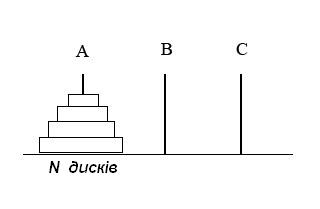

! 💡 Правила:

1. За один крок можна перемістити тільки один диск.
2. Диск можна класти тільки на більший диск або на порожній стрижень.

Вхідними даними програми має бути число n — кількість дисків на початковому стрижні. 
Вихідними даними — логування послідовності кроків для переміщення дисків зі стрижня А на стрижень С.


In [4]:
def move_disk(from_tower, to_tower):
    print("Move disk from core", from_tower, "to core", to_tower)

def move_tower(height, from_tower, to_tower, aux_tower):
    if height >= 1:
        move_tower(height - 1, from_tower, aux_tower, to_tower)
        move_disk(from_tower, to_tower)
        move_tower(height - 1, aux_tower, to_tower, from_tower)

def tower_of_hanoi(number_of_disks):
    move_tower(number_of_disks, 'A', 'C', 'B')

# Введення кількості дисків
number_of_disks = int(input("Enter the number of disks: "))

# Виклик функції для виконання гри Ханойські вежі
tower_of_hanoi(number_of_disks)

Move disk from core A to core C
Move disk from core A to core B
Move disk from core C to core B
Move disk from core A to core C
Move disk from core B to core A
Move disk from core B to core C
Move disk from core A to core C
